# Skattningar och medelfel
En interaktiv version av detta dokument finns [här](https://mybinder.org/v2/gl/oskarr%2Fmiscellaneous-binders/HEAD?labpath=SF1914%2FSannstat-Skattningar.ipynb
). Glöm inte att köra cellerna för att få fram graferna.

## Bakgrund
Det råder viss förvirring vad gäller begreppet medelfel, så jag tänker försöka ge på vad som är vad i detta dokument m.h.a. ett exempel. Medelfelet är en _skattning_ av en _skattning_ av en parameter. Det är alltså ett försök att avgöra hur bra en given skattning är.

Dokumentet är skrivet i programmeringsspråket [Julia](https://julialang.org), ett språk som är ganska likt Python, men som har lite kraftfullare verktyg för generering av slumptal och hantering av listor (enligt mig). Man kan se det som en korsning mellan MATLAB och Python. Om ni har frågor kan ni alltid maila mig, men förmodligen kommer ni mest att ändra värden på variabler om ni ändrar något.

/ Oskar

In [1]:
# Importera lite libraries
using Distributions, Statistics, Plots, StatsPlots;
Plots.gr();Plots.theme(:bright)

## Terminologi
Låt oss börja med att beskriva terminologin.
* $X$ - en godtycklig stokastisk variabel, som tillhör en fördelning. Fördelningen antas bero på parametern $\theta$.
* $\theta$ - En parameter, dvs. något som bestämmer hur en fördelning ser ut. I t.ex. binomialfördelningen $\text{Bin}(n, p)$ är både $n$ och $p$ parametrar.
* $\theta^*_{obs}$ (i koden skriven som `θ⭐🔎`) - Är en _punktskattning_ av $\theta$. Det kan ses som ett närmevärde till $\theta$. Denna erhålls genom lämplig analys av problemställningen, samt observationer av $X$.
* $\theta^*$ - Vilken punktskattning $\theta^*_{obs}$ vi får av $\theta$ beror vanligen på våra observationer $x_k$ av vår stokastiska variabel $X$. Beroende på exakt vilka observationer vi fått, kommer vi få olika $\theta^*_{obs}$, och $\theta^*$ är den stokastiska variabel som beskriver vilka värden på $\theta^*_{obs}$ vi kan få.

## Exempel 1.
Låt $X$ vara den stokastiska variabel som beskriver resultatet av _ett_ tärningskast.

Ponera att vi slår en tärning $n$ gånger (dvs. vi observerar $X$ $n$ gånger). I Julia kan detta genomföras med `rand(1:6, n)`, där `1:6` kan ses som dess MATLAB-motsvarighet, dvs. listan `[1, 2, 3, 4, 5, 6]`, och efterföljande argument beskriver dimensionerna det returnerade värdet. `rand(1:6)` ger ett tal, `rand(1:6, n)` ger en vektor, `rand(1:6, n, m)` ger en matris, osv.

In [2]:
# Definiera en funktion som returnerar en lista med slumpmässiga tärningskast
slåTärning(n::Int) = rand(1:6, n);

# Resultatet blir en vektor
slåTärning(4)

4-element Vector{Int64}:
 6
 2
 6
 2

När vi kastar tärningen, kan vi betrakta medelvärdet. Det blir en punktskattning av väntevärdet av $X$, dvs. om vi låter $E(X)=\mu$, så är $\mu^*_{obs} = \bar x$, där $x$ är våra observerade värden.

In [3]:
# En funktion som slår en tärning n gånger, och tar medelvärdet av utfallen.
skattaVäntevärde(n::Int) = mean(slåTärning(n))

skattaVäntevärde(4)

3.0

Varje gång vi skattar $\mu$ med $\mu^*_{obs}$ på detta sätt får vi ett slumpmässigt värde. Gör vi många skattningar kan vi få en bild av vilka värden på $\mu^*_{obs}$ vi får oftast. Detta kan ses som $\mu^*$:s fördelning.

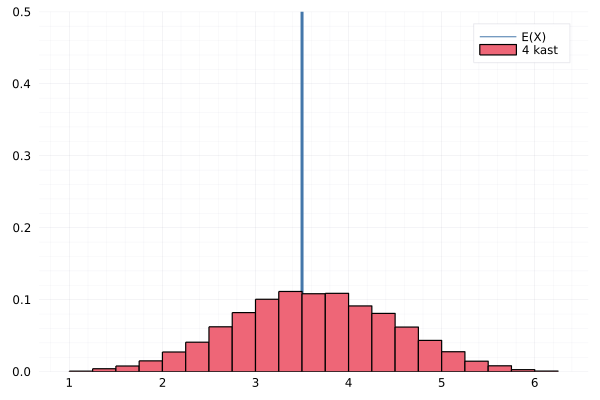

In [4]:
# Skatta medelvärdet m.h.a. 4 tärningskast 10 000 gånger, och plotta fördelningen
N = 10_000
medelvärden_av_4_kast = [skattaVäntevärde(4) for _ in 1:N];

vline([3.5], label = "E(X)", line = (width = 3), ylims = (0, 0.5))
histogram!(medelvärden_av_4_kast, bins=1:0.25:6.25, label = "4 kast", normalize = :probability)

Som vi ser får vi ofta ett värde kring $3.5$, dvs. det faktiska värdet som vi försöker skatta, nämligen väntevärdet $E(X)=\mu=3.5$. Har du fått en något högerförskjuten fördelning, beror det på att alla gånger vi fått exakt $3.5$ räknas till stapeln direkt till höger om $3.5$.

Vi kan se att spridningen av $\theta^*$:s fördelning beror på hur många kast vi gör vid varje skattning. Skattar vi medelvärdet med bara ett kast, kommer fördelningen givetvis att vara densamma som fördelningen för just ett kast. Redan när vi kastar 2 kast börjar fördelningen likna en normalfördelning något. CGS säger att ju fler försök vi gör, deso mer likt normalfördelningen kommer fördelningen att bli.

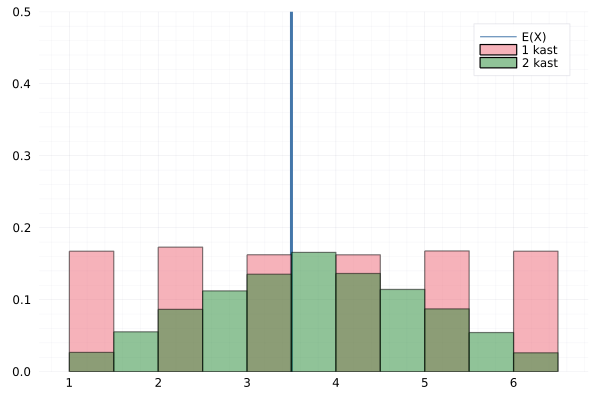

In [5]:
medelvärden_av_1_kast = [skattaVäntevärde(1) for _ in 1:N];
medelvärden_av_2_kast = [skattaVäntevärde(2) for _ in 1:N];

vline([3.5], label = "E(X)", line = (width = 3), ylims = (0, 0.5))
histogram!(medelvärden_av_1_kast, bins=1:0.5:6.5, label = "1 kast", normalize = :probability, opacity = 0.5)
histogram!(medelvärden_av_2_kast, bins=1:0.5:6.5, label = "2 kast", normalize = :probability, opacity = 0.5)

Gör vi ännu fler kast får vi något som är ännu mer likt en normalfördelning, och som även har mindre spridning (standardavvikelse).

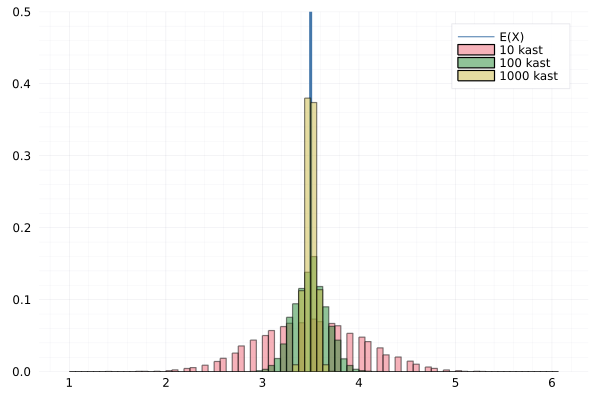

In [6]:
medelvärden_av_10_kast = [skattaVäntevärde(10) for _ in 1:N];
medelvärden_av_100_kast = [skattaVäntevärde(100) for _ in 1:N];
medelvärden_av_1000_kast = [skattaVäntevärde(1000) for _ in 1:N];

vline([3.5], label = "E(X)", line = (width = 3), ylims = (0, 0.5))
histogram!(medelvärden_av_10_kast, bins=1:(1/16):(6+1/16),
            label = "10 kast", normalize = :probability, opacity = 0.5)
histogram!(medelvärden_av_100_kast, bins=1:(1/16):(6+1/16),
            label = "100 kast", normalize = :probability, opacity = 0.5)
histogram!(medelvärden_av_1000_kast, bins=1:(1/16):(6+1/16),
            label = "1000 kast", normalize = :probability, opacity = 0.5)

Ponera nu att vi har skattat $\mu$ genom att ta medelvärdet av ett antal kast, och vi funderar på hur bra vår skattning är. Ett ganska bra sätt att åstadkomma detta är att titta på graferna ovan och försöka avgöra spridningen. Problemet är dock detta. Vi har att $N = 10 000$, och om vi då gör 100 kast per skattning, blir det en miljon tärningskast. 100 kanske är genomförbart för en människa, men en miljon? Knappast. Hur gör vi då om vi bara har $n=100$ kast? Låt oss först bekanta oss med grafen ovan.

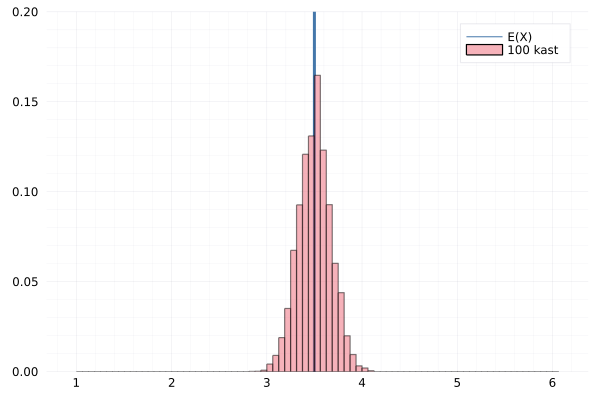

In [7]:
n = 100
medelvärden_av_n_kast = [skattaVäntevärde(n) for _ in 1:N];

vline([3.5], label = "E(X)", line = (width = 3), ylims = (0, 0.2))
histogram!(medelvärden_av_n_kast, bins=1:(1/16):(6+1/16),
            label = "100 kast", normalize = :probability, opacity = 0.5)

Vi kan (låta datorn) beräkna standardavvikelsen och medelvärdet för fördelningen ovan. <a id="100_1"></a>

In [8]:
approximativ_förväntad_fördelning = (
    μ⭐🔎 = mean(medelvärden_av_100_kast),
    σ⭐🔎 = std(medelvärden_av_100_kast)
)

(μ⭐🔎 = 3.4980520000000004, σ⭐🔎 = 0.1712525563015162)

Låt oss nu slumpa fram $n$ kast, och titta på dem:

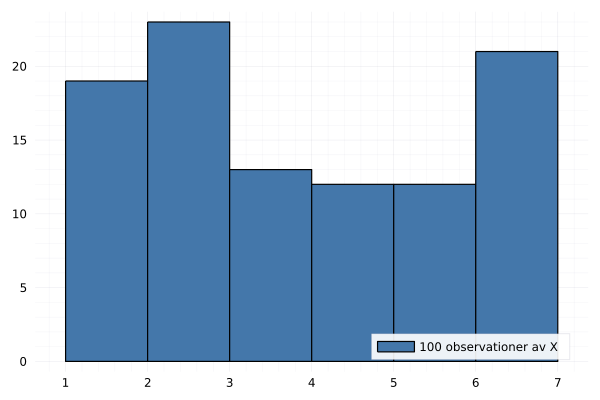

In [9]:
x = slåTärning(n)
histogram(x, bins = 1:7, label = "100 observationer av X", legend = :bottomright)

Vi kan skatta $\mu$ som $\mu^*_{obs}$ genom att ta medelvärdet. Vi kan även skatta $\sigma$ som stickprovsstandardavvikelsen $s$.

In [10]:
μ⭐🔎 = mean(x)

3.38

In [11]:
s = std(x)

1.835563381987375

Vi ville dock inte veta standardavvikelsen av $X$, utan spridningen (standardavvikelsen) $\mu^*$. $\mu^*$ erhålls genom:
$$\mu^* = \bar X = \frac{\sum_{i=1}^{n} X_i}{n}$$
Vi söker standardavvikelsen, via variansen:
$$V(\mu^*) = V\left(\frac{\sum_{i=1}^{n} X_i}{n}\right) \overset{X_i\,ober.}{=} \frac{\sum_{i=1}^{n} V(X_i)}{n^2}  = \frac{\sum_{i=1}^{n} \sigma^2}{n^2} = \frac{\sigma^2}{n}$$

$$D(\mu^*) = \frac{\sigma}{\sqrt n}$$

### Side-note
Nu kan vi teoretiskt beräkna sigma:
$$\sigma = \sqrt{E(X^2)-E^2(X)}$$

In [12]:
σ = sqrt(sum([x^2 * 1/6 for x in 1:6]) - sum([x * 1/6 for x in 1:6])^2)

1.7078251276599334

och verifiera att vår skattning av $D(\mu^*)$ <a href="#100_1">ovan</a> stämmer hyfsat. Det teoretiska värdet borde bli:

In [13]:
σ/sqrt(n)

0.17078251276599335

In [14]:
# Skattningen från innan. (Obs! Detta är inte att betrakta som medelfelet.)
approximativ_förväntad_fördelning.σ⭐🔎

0.1712525563015162

### Tillbaka till tråden
Ofta har man dock problemet att $\sigma$ inte är känt, och då måste man skatta $\sigma$ med t.ex. $s$. Gör man det får man inte det faktiska värdet på $D(\mu^*)$, utan bara en skattning av denna, $D(\mu^*)^*_{obs} = d(\mu^*)$, dvs. det som kallas för medelfelet. Gör vi detta får vi:
$$D(\mu^*)^*_{obs} = \left(\frac{\sigma}{\sqrt n}\right)^*_{obs} = \frac{\sigma^*_{obs}}{\sqrt n} = \frac{s}{\sqrt n}$$
Dvs:

In [15]:
s/sqrt(n)

0.18355633819873748

Antar vi att $n$ är "stort", och därmed antar att $\mu^*$ är normalfördelad kan vi rita upp saker som följande:

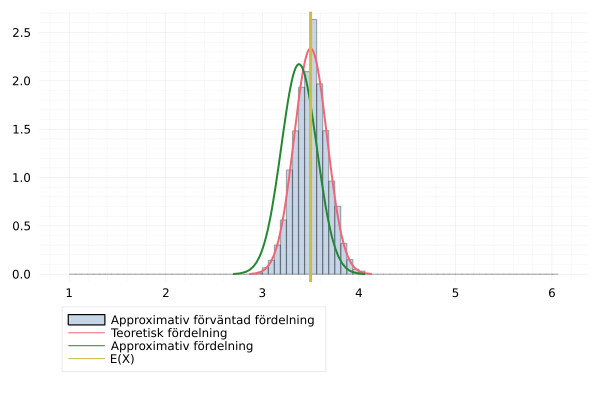

In [16]:
histogram(medelvärden_av_n_kast, bins=1:(1/16):(6+1/16), label = "Approximativ förväntad fördelning", normalize = :pdf, opacity = 0.3)
plot!(Distributions.Normal(3.5, σ/sqrt(n)), label = "Teoretisk fördelning", line = (width = 2))
plot!(Distributions.Normal(μ⭐🔎, s/sqrt(n)), label = "Approximativ fördelning", line = (width = 2))
vline!([3.5], label = "E(X)", line = (width = 3), legend = :outerbottom)

Vi har alltså den approximativa förväntade fördelningen från innan (när vi skattade medelvärdet med $n$ kast, upprepat $N$ gånger), den teoretiska (faktiska) fördelningen för $\mu^*$, och en approximativ fördelning av $\mu^*$ som vi fått genom att bara kasta 100 kast. Det är denna sistnämnda som ligger till grund för konfidensintervall i de mer generella fall, där vi inte nödvändigtvis känner till den underliggande fördelningen (vilken i vårt fall var tärningskast). Betraktar vi enbart denna får vi:

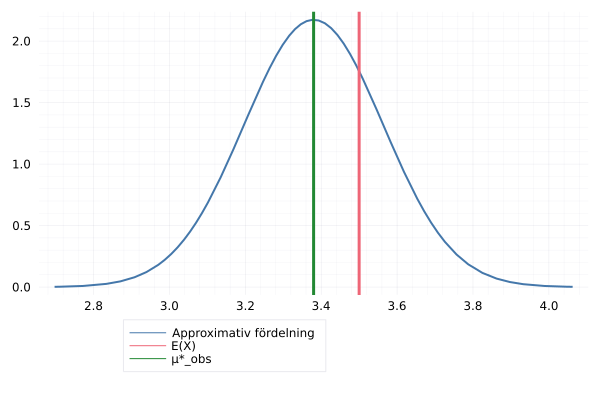

In [17]:
plot(Distributions.Normal(μ⭐🔎, s/sqrt(n)), label = "Approximativ fördelning", line = (width = 2))
vline!([3.5], label = "E(X)", line = (width = 3), legend = :outerbottom)
vline!([μ⭐🔎], label = "μ*_obs", line = (width = 3))

Vi har sedan innan att $\mu^* \sim N(\mu, \frac{\sigma}{\sqrt n})$.
Normaliserar vi denna, erhåller vi:
$$\frac{\mu^*-\mu}{\sigma/\sqrt n} \sim N(0, 1)$$
Alltså är skillnaden mellan $\mu^*$ och $\mu$ också approximativt normalfördelad! Nu kan vi söka ett intervall som kommer att innehålla denna skillnad 95% av gångerna. Vi har $\alpha = 0.05$ och $\lambda_{\alpha/2} = 1.96$ och att
$$P(-\lambda_{\alpha/2} < Y \leq \lambda_{\alpha/2}) = 1 - \alpha$$
för alla $Y\in N(0,1)$. Låter vi:
$$Y =\frac{\mu^*-\mu}{D(\mu)/\sqrt n}$$
kan vi skriva om detta som:
$$\begin{align*}
1-\alpha &= P(-\lambda_{\alpha/2} < Y \leq \lambda_{\alpha/2})\\
&\approx P(-\lambda_{\alpha/2} < \frac{\mu^*-\mu}{\sigma/\sqrt n} \leq \lambda_{\alpha/2})\\
&= P(\mu^*-\lambda_{\alpha/2} {\frac{D(\mu)}{\sqrt n}} < -\mu \leq \mu^* + \lambda_{\alpha/2} {\frac{D(\mu)}{\sqrt n}})\\
&= P(\mu^*-\lambda_{\alpha/2} {\frac{D(\mu)}{\sqrt n}} \leq \mu < \mu^* + \lambda_{\alpha/2} {\frac{D(\mu)}{\sqrt n}})
\end{align*}$$

Vilket kan tolkas som att $\mu$ ligger inom intervallet $\mu^* + \lambda_{\alpha/2} {\frac{D(\mu)}{\sqrt n}}$ med sannolikheten $1-\alpha$. Vill vi rita upp det för $\alpha = 5\%$ (likt ovan), får vi följande (om vi skattar $\sigma$ med $s$):

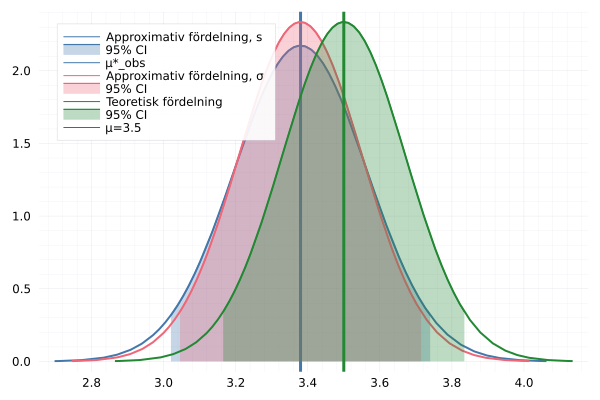

In [18]:
λ = 1.96

interval_s = μ⭐🔎 .+ range(-λ*s/sqrt(n), λ*s/sqrt(n), length = 100)
interval_σ = μ⭐🔎 .+ range(-λ*σ/sqrt(n), λ*σ/sqrt(n), length = 100)
interval_a = 3.5 .+ range(-λ*σ/sqrt(n), λ*σ/sqrt(n), length = 100)

dist_approx_s = Distributions.Normal(μ⭐🔎, s/sqrt(n))
dist_approx_σ = Distributions.Normal(μ⭐🔎, σ/sqrt(n))
dist_actual = Distributions.Normal(3.5, σ/sqrt(n))

plot(dist_approx_s, label = "Approximativ fördelning, s", line = (width = 2), color = 1)
plot!(interval_s, [pdf(dist_approx_s, x) for x in interval_s], label = "95% CI", fill = (0.3, 0), color=1)
vline!([μ⭐🔎], label = "μ*_obs", line = (width = 3), color = 1)

plot!(dist_approx_σ, label = "Approximativ fördelning, σ", line = (width = 2), color = 2)
plot!(interval_σ, [pdf(dist_approx_σ, x) for x in interval_σ], label = "95% CI", fill = (0.3, 0), color=2)

plot!(dist_actual, label = "Teoretisk fördelning", line = (width = 2), color = 3)
plot!(interval_a, [pdf(dist_actual, x) for x in interval_a], label = "95% CI", fill = (0.3, 0), color=3)
vline!([3.5], label = "μ=3.5", line = (width = 3), color = 3)
plot!(legend = :topleft)

Vi kan se att den approximativa fördelningen med givet $\sigma$ är en translation av den teoretiska fördelningen, dvs. om $\mu^*_obs$ ligger inom den teoretiska fördelningens konfidensintervall, ligger även $\mu$ i den approximativa fördelningens intervall.

Detsamma gäller inte för den approximativa fördelningen med $s$, eftersom $s$ kan skilja sig från $\sigma$. Dock gäller att om $s$ är en väntevärdesriktig skattning av $\sigma$, kommer sannolikheten att $\mu$ i den approximativa fördelningens intervall fortfarande att vara $1-\alpha$, då felen tar ut sig i längden. Alltså: sannolikheten att $\mu$ återfinns i konfidensintervallet beror på hur bra skattning $s$ är av $\sigma$, men om även om vi inte vet hur fel $s$ är, kommer de fall där $s<\sigma$ (smalare konfidensintervall) att kompensera för de fall då $s>\sigma$, så att sannolikheten förblir 95%. Alternativt:

$$P(\mu \in C_\mu) = 95\%$$
trots att
$$P(\mu \in C_\mu | s < \sigma) < 95\%$$
och
$$P(\mu \in C_\mu | s > \sigma) > 95\%$$
där $C_\mu$ är vårt konfidensintervall för $\mu$.